# 라이브러리 불러오기

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np

In [38]:
kospi_data = pd.read_csv('./KOSPI_DATA.csv')
hynix_data = pd.read_csv('./HYNIX_DATA.csv')

In [39]:
kospi_data = kospi_data.set_index('Date')
kospi_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,2037.040039,2065.379883,2035.630005,2065.080078,2065.080078,997300
2020-06-02,2061.449951,2089.429932,2059.139893,2087.189941,2087.189941,1000300
2020-06-03,2108.550049,2156.550049,2107.689941,2147.000000,2147.000000,1152000
2020-06-04,2181.639893,2191.000000,2139.679932,2151.179932,2151.179932,1393300
2020-06-05,2151.169922,2187.250000,2138.179932,2181.870117,2181.870117,854600
...,...,...,...,...,...,...
2023-05-24,2557.110107,2572.209961,2555.040039,2567.449951,2567.449951,1071600
2023-05-25,2570.639893,2575.050049,2551.489990,2554.689941,2554.689941,916700
2023-05-26,2561.939941,2567.500000,2553.790039,2558.810059,2558.810059,631800


In [40]:
hynix_data = hynix_data.set_index('Date')
hynix_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,82100.0,83700.0,82100.0,83600.0,80398.109375,4205357
2020-06-02,82700.0,83600.0,82700.0,83300.0,80109.593750,3114162
2020-06-03,83400.0,89200.0,83400.0,88700.0,85302.773438,11642239
2020-06-04,90000.0,91600.0,87100.0,87700.0,84341.062500,6678244
2020-06-05,88500.0,90800.0,87700.0,90400.0,86937.656250,4000557
...,...,...,...,...,...,...
2023-05-24,97400.0,97800.0,96300.0,97700.0,97700.000000,2097933
2023-05-25,104300.0,104300.0,101100.0,103500.0,103500.000000,7431586
2023-05-26,107500.0,110500.0,106100.0,109200.0,109200.000000,10136706


---
# 코스피 변화율과 하이닉스 변화율 회귀분석

In [41]:
kospi_data["ln_diff"] = (np.log(kospi_data["Close"]) - np.log(kospi_data["Close"]).shift(1))*100
hynix_data["ln_diff"] = (np.log(hynix_data["Close"]) - np.log(hynix_data["Close"]).shift(1))*100

In [42]:
import statsmodels.api as sm

In [43]:
HYNIX = hynix_data.iloc[1:1000, 6]
KOSPI = kospi_data.iloc[1:1000, 6]

In [44]:
print("하이닉스변화율:" ,HYNIX.describe() , " \n 코스피변화율:" , KOSPI.describe())     # describe 를 통해서 얻은 인사이트를 잘 녹여내면 best

하이닉스변화율: count    740.000000
mean       0.035355
std        2.212871
min       -7.649603
25%       -1.410366
50%        0.000000
75%        1.388934
max        8.849671
Name: ln_diff, dtype: float64  
 코스피변화율: count    740.000000
mean       0.029933
std        1.114583
min       -4.876161
25%       -0.667658
50%        0.111573
75%        0.731761
max        5.145460
Name: ln_diff, dtype: float64


In [45]:
HYNIX

Date
2020-06-02   -0.359497
2020-06-03    6.281134
2020-06-04   -1.133799
2020-06-05    3.032237
2020-06-08    0.661524
                ...   
2023-05-24   -0.204499
2023-05-25    5.767005
2023-05-26    5.360945
2023-05-30    1.002286
2023-05-31   -1.553252
Name: ln_diff, Length: 740, dtype: float64

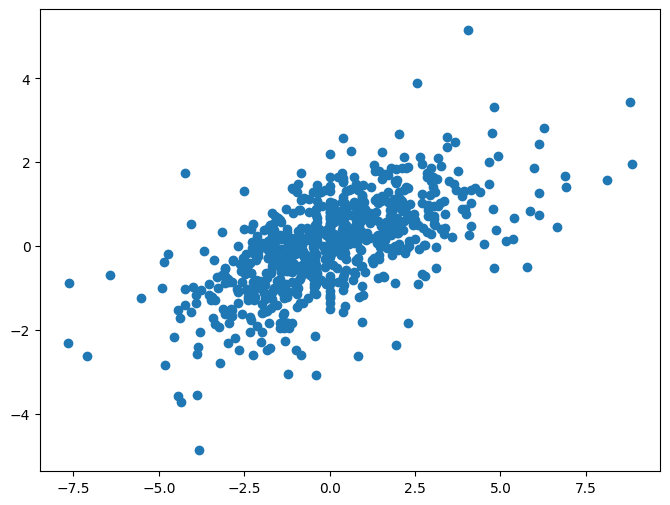

In [46]:
# 회귀분석
import matplotlib.pyplot as plt

plt.figure(figsize  = (8,6))
plt.scatter(HYNIX, KOSPI)
plt.show()

In [47]:
HYNIX_value = hynix_data.iloc[1:1000, 6].values
KOSPI_value = kospi_data.iloc[1:1000, 6].values

model = sm.OLS(KOSPI_value, HYNIX_value).fit()
model.summary()

# R스퀘어 1에 가까울수록 모델 성능이 좋다

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              470.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                    3.76e-81
Time:                        20:15:01   Log-Likelihood:                         -947.68
No. Observations:                 740   AIC:                                      1897.
Df Residuals:                     739   BIC:                                      1902.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3143      0.014     21.698      0.000       0.286       0.343
==============================================================================
Omnibus:                       30.485   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.830
Skew:                          -0.230   Prob(JB):                     1.38e-14
Kurtosis:                       4.363   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model = sm.OLS(HYNIX_value , KOSPI_value).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              470.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                    3.76e-81
Time:                        20:15:01   Log-Likelihood:                         -1455.0
No. Observations:                 740   AIC:                                      2912.
Df Residuals:                     739   BIC:                                      2917.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2382      0.057     21.698      0.000       1.126       1.350
==============================================================================
Omnibus:                       45.495   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.626
Skew:                           0.413   Prob(JB):                     4.21e-19
Kurtosis:                       4.436   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared: 결정계수, 1에 가까워질수록 모델 설명력 상승
- Adj. R-squared: 모델에 도움이 되는 데이터에 따라 조정된 결정계수
- AIC: 표본의 개수와 모델의 복잡성을 기반으로 모델을 평가하며, 낮을 수록 좋음
- BIC: AIC와 유사하나 패널티를 부여하여 AIC보다 모델 평가 성능이 더 좋으며, 수치가 낮을 수록 좋음
- coef: 회귀계수(독립변수가 한 단위 변화함에 따라 종속변수가 미치는 영향력 크기)
- str err: 계수 추정치의 표준오차, 값이 작을 수록 좋음
- t: t-test, 독립변수와 종속변수 사이의 상관관계, 값이 클 수록 상관성이 높다는 뜻
- P>|t|: 독립변수들의 유의확률, 0.05보다 작아야 유의미하다고 해석
- [0.025, 0.975]: 회귀 계수의 신뢰구간
- Skew: 왜도 / 평균 주위의 잔차들의 대칭하는지는 보는 지표, 0에 가까울수록 대칭
- Kustosis: 첨도 / 잔차들의 분포 모양, 3에 가까울 수록 정규분포(음수이면 평평한 형태, 양수이면 뽀족한 형태)
- Durbin-Watson: 더빈왓슨 정규성 검정, 잔차의 독립성 여부를 판단(1.5~2.5 사이일때 잔차는 독립적이라고 판단하며 0이나 4에 가까울수록 잔차들은 자기상관을 가지고 있다고 판단) 
- Jarque-Bera (JB): 자크베라 정규성 검정, 클 수록 정규분포의 데이터를 사용했다는 것
- Cond. No.: 다중공선성 검정, 독립변수간 상관관계가 있는지 보는 것이며, 10이상이면 다중공선성이 있다고 판단
- VIF : 5 나 10 넘으면 다중공선성이 존재한다고 판단

---
# 코스피 종가와 하이닉스 종가 회귀분석

In [49]:
HYNIX_CLOSE = hynix_data.iloc[1:1000, 3]
KOSPI_CLOSE= kospi_data.iloc[1:1000, 3]

In [50]:
mean_se = HYNIX_CLOSE.mean()
mean_ko = KOSPI_CLOSE.mean()

In [51]:
HYNIX_CLOSE = HYNIX_CLOSE.fillna(mean_se)
KOSPI_CLOSE = KOSPI_CLOSE.fillna(mean_ko)

In [52]:
print("삼성종가:" ,HYNIX_CLOSE.describe() , " \n 코스피종가:" , KOSPI_CLOSE.describe())

삼성종가: count       740.000000
mean     104048.378378
std       18620.964223
min       71800.000000
25%       87300.000000
50%      100000.000000
75%      120500.000000
max      148500.000000
Name: Close, dtype: float64  
 코스피종가: count     740.000000
mean     2681.504875
std       347.063240
min      2030.819946
25%      2394.232544
50%      2605.055054
75%      3012.994934
max      3305.209961
Name: Close, dtype: float64


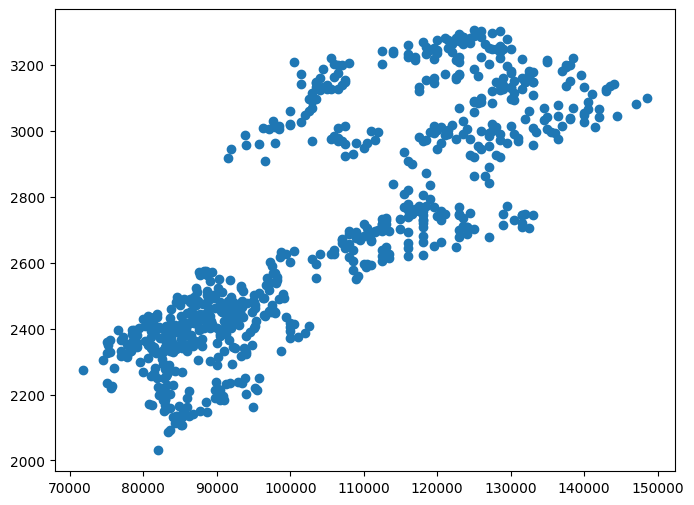

In [53]:
plt.figure(figsize  = (8,6))
plt.scatter(HYNIX_CLOSE, KOSPI_CLOSE)
plt.show()

In [54]:
HYNIX_CLOSE_value = HYNIX_CLOSE.values
KOSPI_CLOSE_value= KOSPI_CLOSE.values
model = sm.OLS(KOSPI_CLOSE_value, HYNIX_CLOSE_value).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          7.280e+04
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                        0.00
Time:                        20:15:02   Log-Likelihood:                         -5195.7
No. Observations:                 740   AIC:                                  1.039e+04
Df Residuals:                     739   BIC:                                  1.040e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0255   9.43e-05    269.815      0.000       0.025       0.026
==============================================================================
Omnibus:                       17.718   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.198
Skew:                          -0.282   Prob(JB):                     0.000501
Kurtosis:                       2.583   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
kospi_data.reset_index(drop=True, inplace=True)
hynix_data.reset_index(drop=True, inplace=True)

In [56]:
kospi_data = kospi_data[['Close']]
hynix_data = hynix_data[['Close']]

In [57]:
# 740 컬럼이고, 1일 예측을 진행할 것이기 때문에 740 / 1 컬럼으로 나눕니다.
# train set split

a = 740

X_train = kospi_data.iloc[:a]
y_train = hynix_data.iloc[:a]

# test set split

X_test = kospi_data.iloc[a:]
y_test = hynix_data.iloc[a:]

# 실습

In [58]:
# mean_squared_error, mean_absolute_error, np.sqrt(mean_squared_log_error) print
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

rl = LinearRegression()
rl.fit(X_train, y_train)

y_pred = rl.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MSE : {mse:.3f}, MAE:{mae:.3f}")
print(f"RMSE : {rmse:.3f}")

MSE : 84489963.756, MAE:9191.842
RMSE : 9191.842


# Scaling

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StrandardScaler() Scaler객체 생성.
scaler = StandardScaler()
# 학습 데이터에 대해서 fit(), transform() 수행.
scaler.fit(kospi_data)
train_scaled_SS = scaler.transform(kospi_data)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_SS = pd.DataFrame(data = train_scaled_SS, columns=kospi_data.columns)

# 테스트 데이터에서는 다시 fit(), transform()이나 fit_transform()을 수행하지 않고 transform만 수행.
test_scaled_SS = scaler.transform(hynix_data)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_SS = pd.DataFrame(data = test_scaled_SS, columns=hynix_data.columns)


# ------------------------------------------ #


# MinMaxScaler() Scaler객체 생성.
scaler = MinMaxScaler()
# 학습 데이터에 대해서 fit(), transform() 수행.
scaler.fit(kospi_data)
train_scaled_MM = scaler.transform(kospi_data)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_MM = pd.DataFrame(data = train_scaled_MM, columns=kospi_data.columns)

# 테스트 데이터에서는 다시 fit(), transform()이나 fit_transform()을 수행하지 않고 transform만 수행.
test_scaled_MM = scaler.transform(hynix_data)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_MM = pd.DataFrame(data = test_scaled_MM, columns=hynix_data.columns)


# ------------------------------------------ #


# RobustScaler() Scaler객체 생성.
scaler = RobustScaler()
# 학습 데이터에 대해서 fit(), transform() 수행.
scaler.fit(kospi_data)
train_scaled_RB = scaler.transform(kospi_data)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_RB = pd.DataFrame(data = train_scaled_RB, columns=kospi_data.columns)

# 테스트 데이터에서는 다시 fit(), transform()이나 fit_transform()을 수행하지 않고 transform만 수행.
test_scaled_RB = scaler.transform(hynix_data)
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_RB = pd.DataFrame(data = test_scaled_RB, columns=hynix_data.columns)

In [61]:
# Standard
# train set split

a = 740

X_train = X_train_SS.iloc[:a]
y_train = X_test_SS.iloc[:a]

# test set split

X_test = X_train_SS.iloc[a:]
y_test = X_test_SS.iloc[a:]

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print('MAE :', round(mean_absolute_error(y_test, pred),6))
print('MSE :', round(mean_squared_error(y_test, pred),6))
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, pred)),6))

MAE : 26.464099
MSE : 700.348514
RMSE : 26.464099


In [63]:
# MinMax
# train set split

a = 740

X_train = X_train_MM.iloc[:a]
y_train = X_test_MM.iloc[:a]

# test set split

X_test = X_train_MM.iloc[a:]
y_test = X_test_MM.iloc[a:]

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print('MAE :', round(mean_absolute_error(y_test, pred),6))
print('MSE :', round(mean_squared_error(y_test, pred),6))
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, pred)),6))

MAE : 7.212739
MSE : 52.0236
RMSE : 7.212739


In [65]:
# Robust
# train set split

a = 740

X_train = X_train_RB.iloc[:a]
y_train = X_test_RB.iloc[:a]

# test set split

X_test = X_train_RB.iloc[a:]
y_test = X_test_RB.iloc[a:]

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print('MAE :', round(mean_absolute_error(y_test, pred),6))
print('MSE :', round(mean_squared_error(y_test, pred),6))
print('RMSE :', round(np.sqrt(mean_squared_error(y_test, pred)),6))

MAE : 14.830574
MSE : 219.945935
RMSE : 14.830574
